# Model capacity, regularization
---


Ideally you want to select a model which has just pefect capacity. It's not too complex to overfit, and it's not too simple to underfit. 

When you know the phenomenon, it is possible to pick a suitable model by hand. But if you don't know anything about the data, how can you achieve it?

One solution is to select a model with high capacity, but force it to be simple when possible. This is called regularization.

A simpler model generally means that its more smooth, it has fewer non-zero parameters. You can achieve it by simply adding a term to your loss function which penalizes large (non-zero) parameters. 

$$ Loss = Loss_{error} + Loss_{penalty}$$


Popular errors are the L1, and L2 norm of the parameters.

$$ Loss = Loss_{error} + \lambda_1\sum{|w_i|} + \lambda_2\sum{w_i^2} $$


L1 is used: it is called Lasso regression. This penalty forces the non-important parameters to be exactly zero. The model will be sparse.

L2 is used: it is called Rigde regression (weigth decay). This penalty forces the non-important parameters to be small but not exactly zero. The model will not be sparse.

L1 and L2: Elastic net. Also sparse model.

----

This notebook was created by Dezso Ribli, if you have any remarks or questions, please contact me.

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The polynom fitting example

* Create noisy data from a second order polynomial relationship.
* Try to fit it with a linear model, it will underfit.
* Try to fit it with a 10th order polynom it will overfit.

In [2]:
N = 20  # number of points
M = 10  # polynom degree
x = linspace(0,1,N) + (random.rand(N)-0.5) *0.1  # x with error
y =  (x-0.42)**2 + 4.2 + (random.rand(N)-0.5) *0.1  # y with error

Just plot it.

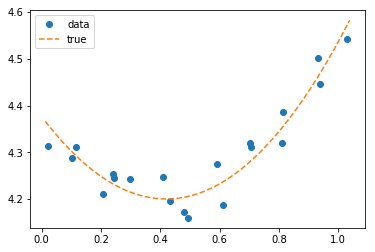

In [3]:
# smooth x for plotitng lines
smoothx = linspace(min(x)-0.01,max(x)+0.01,100)  

plot(x,y,'o',label='data')
plot(smoothx,(smoothx-0.42)**2 + 4.2, '--',label='true')
_=legend()

Import polinomial features, and linear regression

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Fit it

In [5]:
# fit a linear
model = LinearRegression()  # init model
model.fit(x.reshape(-1,1),y)  # fit it
yuf = model.predict(x.reshape(-1,1))

# create polinom features
xp = PolynomialFeatures(M).fit_transform(x.reshape(-1,1))
model = LinearRegression()  # init model
model.fit(xp,y)  # fit it

# creat smooth y for plotting
smoothxp = PolynomialFeatures(M).fit_transform(smoothx.reshape(-1,1))
yp = model.predict(smoothxp)  # predict on smooth grid

Plot it

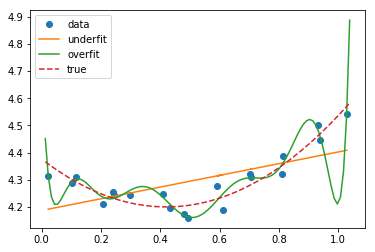

In [6]:
plot(x,y,'o',label='data')
plot(x,yuf,'-',label='underfit')
plot(smoothx,yp,'-',label='overfit')

plot(smoothx,(smoothx-0.42)**2 + 4.2, '--',label='true')
_=legend()

### Fit with regularization

In [7]:
from sklearn.linear_model import Ridge  # L2

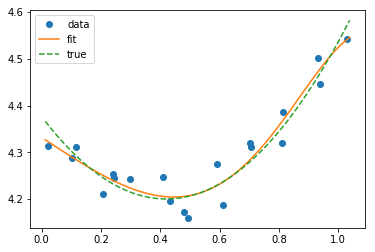

In [8]:
model = Ridge(alpha =0.001)
model.fit(xp,y)
smoothxp = PolynomialFeatures(M).fit_transform(smoothx.reshape(-1,1))
yp = model.predict(smoothxp)


plot(x,y,'o',label='data')
plot(smoothx,yp,'-',label='fit')
plot(smoothx,(smoothx-0.42)**2 + 4.2, '--',label='true')
_=legend()

# Message

- Overfitting can be tamed with regularization. Don't be afraid of very complicated models.

# More: General regularization 

Note that the penalty causes the original model to be **less** accurate on the training data, but **more** accurate on unseen data. Generally you can call any method a 'regularization' if it does not reduce training error, but reduces test error, therefore improves model generalization.

Simple penalties are not the only way to regularize a model. For example neural networks employ a vast army of different regularizations: Dropouts, Batch normalization, early stopping and more. 
These tricks allow us to train models with hundreds of million of paramaters, and still not overfit (too badly).